
<div style="background-color: #8FC93A; padding: 20px; border-radius: 8px; text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <h1 style="color: white; margin: 0;">Recommender Systems</h1>


<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 10px; margin-bottom: 10px;">
    <h1 style="color: white; margin: 0;">Recheio Cash & Carry</h1>
</div>

GROUP NUMBER: **M** 

GROUP MEMBERS:

|STUDENT NAME|STUDENT NUMBER|
|---|---|
|Leonor Wanzeller|20240586|
|Maria Pereira|20240314|
|Maria Francisca Fialho|20240346|
|Miguel Mangerona|20240595|´
|Rita Coelho Morgadito|20240611 |

## Dataset description
This dataset is related to Client information from Recheio

#### Clients
- **Client ID**
- **ZIP Code**
- **ID Client Type**

#### Products
- **ID Product**
- **Product Description**
- **ID Product Category**

#### Transactions

- **Date**
- **Client ID**
- **ID Product**


In [7]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from matplotlib.ticker import FuncFormatter
from scipy.stats.mstats import winsorize
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
import pycountry
import pycountry_convert as pc
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import fastcluster


pd.set_option('display.max_columns', None)

In [8]:
## pip install pgeocode


In [9]:
from pgeocode import GeoDistance

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [11]:
# We compose a pallete to use in the vizualizations
pal = [
    "#006B3F",  # Dark Green
    "#8FC93A",  # Light Green
    "#1D1D1B",  # Black
    "#FFFFFF",  # White
    "#D9D9D9"   # Light Grey
]


<a id = "Index"></a>

<div style="background-color:#8FC93A; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Data Understanding](#Data-Understanding)
2. [Data Preparation](#Data-Preparation)
3. [Feature Selection](#Feature-Selection)
4. [Scaling](#Scaling)
5. [Clustering](#Clustering)

<a id = "Data-Understanding"></a>
    
<div style="background-color: #8FC93A; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Data Understanding</h1>
</div>

[1.1 Data Loading and Description](#Data-Load)

[1.2 Data Visualization](#Data-Vizualization)


<a id = "Data-Load"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2. Data Loading and Description </h3>
</div>

- [Data Shape](#ds)
- [Data Types](#dt)
- [Summary Statistics](#ss)

[Back to Index](#Index)

In [12]:
excel_file= "Case3_Recheio_2025.xlsx"

In [13]:
clients_df = pd.read_excel(excel_file, sheet_name='1. CLIENTS')
products_df = pd.read_excel(excel_file, sheet_name='2. PRODUCTS')
transactions_df = pd.read_excel(excel_file, sheet_name='3. TRANSACTIONS')

<div style="background-color: #1D1D1B; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Clients</h2>
</div>

In [14]:
clients_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Client ID,ZIP Code,ID Client Type
1,NaN,210100002,4049,NaN
2,NaN,210100003,4000,NaN
3,NaN,210100004,4149,NaN
4,NaN,210100005,4100,Hotelaria


+ We can eliminate the first tow
+ Check if the first column contains values otherwise we can eliminate it too

In [15]:
clients_df.columns = clients_df.iloc[0]  # Defining the firts row names as the column names
clients_df = clients_df[1:].reset_index(drop=True) # eliminate the row with the previous column names

In [16]:
clients_df.head()

,NaN,Client ID,ZIP Code,ID Client Type
0,NaN,210100002,4049,NaN
1,NaN,210100003,4000,NaN
2,NaN,210100004,4149,NaN
3,NaN,210100005,4100,Hotelaria
4,NaN,210100006,4405,NaN


<a id = "ds"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Data Shape</h4>
</div>

In [17]:
# Shape (no rows,no columns)
clients_df.shape

(6462, 4)

+ The dataset has 6462 rows and 4 columns

In [18]:
# Missing Values
clients_df.isna().sum()

0
NaN               6462
Client ID            0
ZIP Code             0
ID Client Type    5782
dtype: int64

+ Once the first column only contains Nan values, we can exclude it

In [19]:
# Exclude the first column
clients_df = clients_df.iloc[:, 1:]


In [21]:
clients_df.head(3)

,Client ID,ZIP Code,ID Client Type
0,210100002,4049,NaN
1,210100003,4000,NaN
2,210100004,4149,NaN


In [22]:
# doing a copy of the dataframe cleaned
clients_df_copy = clients_df.copy()

<a id = "dt"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Data Types</h4>
</div>


In [23]:
clients_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Client ID       6462 non-null   object
 1   ZIP Code        6462 non-null   object
 2   ID Client Type  680 non-null    object
dtypes: object(3)
memory usage: 151.6+ KB


All the existing columns are categorical and there are no missing values 

<a id = "ss"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Summary Statistics</h4>
</div>

In [24]:
# Summary statistics for discrete variables
clients_df.describe(include='all').T

,count,unique,top,freq
0,,,,
Client ID,6462,6462,210100002,1
ZIP Code,6462,261,4050,927
ID Client Type,680,26,Hotelaria,231


+ **Client_ID**: All values are unique
+ **ZIP Code**: There are 261 different Codes
+ **ID Client Type**: There are 26 different types of customers

<div style="background-color: #1D1D1B; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Products</h2>
</div>

In [25]:
products_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,ID Product,Product Description,ID Product Category
1,NaN,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
2,NaN,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
3,NaN,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
4,NaN,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS


In [26]:
products_df.columns = products_df.iloc[0]  # Defining the firts row names as the column names
products_df = products_df[1:].reset_index(drop=True) # eliminate the row with the previous column names

In [27]:
products_df.head()

,NaN,ID Product,Product Description,ID Product Category
0,NaN,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,NaN,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,NaN,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,NaN,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,NaN,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


<a id = "ds"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Data Shape</h4>
</div>

In [28]:
# Shape (no rows,no columns)
products_df.shape

(4583, 4)

+ The dataset has 4583 rows and 4 columns

In [29]:
# Missing Values
products_df.isna().sum()

0
NaN                    4583
ID Product                0
Product Description       0
ID Product Category       0
dtype: int64

In [30]:
# Exclude the first column
products_df = products_df.iloc[:, 1:]


In [31]:
products_df.head()

,ID Product,Product Description,ID Product Category
0,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


In [32]:
# doing a copy of the dataframe cleaned
products_df_copy = products_df.copy()

<a id = "dt"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Data Types</h4>
</div>

In [33]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID Product           4583 non-null   object
 1   Product Description  4583 non-null   object
 2   ID Product Category  4583 non-null   object
dtypes: object(3)
memory usage: 107.5+ KB


<a id = "ss"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Summary Statistics</h4>
</div>

In [34]:
# Summary statistics for discrete variables
products_df.describe(include='all').T

,count,unique,top,freq
0,,,,
ID Product,4583,4583,224780,1
Product Description,4583,4573,CABO ESFREGONA VILEDA SUPER 1UN,2
ID Product Category,4583,268,VINHOS TINTOS,175


+ **ID Product**: All values are unique
+ **Product Description**: There are 4573 different descriptions
+ **ID Product Category**: There are 268 different types of products

<div style="background-color: #1D1D1B; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Transactions</h2>
</div>

In [35]:
transactions_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Date,Client ID,ID Product
1,NaN,2022-01-02 00:00:00,210100281,224780
2,NaN,2022-01-02 00:00:00,210100281,276806
3,NaN,2022-01-02 00:00:00,210100281,276809
4,NaN,2022-01-02 00:00:00,210100281,277674


In [36]:
transactions_df.columns = transactions_df.iloc[0]  # Defining the firts row names as the column names
transactions_df = transactions_df[1:].reset_index(drop=True) # eliminate the row with the previous column names

In [37]:
transactions_df.head()

,NaN,Date,Client ID,ID Product
0,NaN,2022-01-02 00:00:00,210100281,224780
1,NaN,2022-01-02 00:00:00,210100281,276806
2,NaN,2022-01-02 00:00:00,210100281,276809
3,NaN,2022-01-02 00:00:00,210100281,277674
4,NaN,2022-01-02 00:00:00,210100281,277917


<a id = "ds"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Data Shape</h4>
</div>

In [38]:
# Shape (no rows,no columns)
transactions_df.shape

(884099, 4)

+ The dataset has 884099 rows and 4 columns

In [39]:
# Missing Values
transactions_df.isna().sum()

0
NaN           884099
Date               0
Client ID          0
ID Product         0
dtype: int64

In [40]:
# Exclude the first column
transactions_df = transactions_df.iloc[:, 1:]


In [41]:
transactions_df.head()

,Date,Client ID,ID Product
0,2022-01-02 00:00:00,210100281,224780
1,2022-01-02 00:00:00,210100281,276806
2,2022-01-02 00:00:00,210100281,276809
3,2022-01-02 00:00:00,210100281,277674
4,2022-01-02 00:00:00,210100281,277917


In [42]:
# doing a copy of the dataframe cleaned
transactions_df_copy = transactions_df.copy()

<a id = "dt"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Data Types</h4>
</div>

In [43]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884099 entries, 0 to 884098
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        884099 non-null  object
 1   Client ID   884099 non-null  object
 2   ID Product  884099 non-null  object
dtypes: object(3)
memory usage: 20.2+ MB


<a id = "ss"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">Summary Statistics</h4>
</div>

In [44]:
# Summary statistics for discrete variables
transactions_df.describe(include='all').T

,count,unique,top,freq
0,,,,
Date,884099,311,2022-10-01 00:00:00,5441
Client ID,884099,1529,210103651,13274
ID Product,884099,4583,621958,12009


<a id = "Data-Vizualization"></a>

<div style="background-color: #8FC93A; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2. Data Visualization </h3>
</div>

- [Zip Code](#zip)
- [Boolean variables](#bol)
- [Categorical variables](#cat)
- [Customer Behaviour](#cb)
- [Revenue](#rev)
- [Room Preferences](#rp)
- [Correlation](#cor)

[Back to Index](#Index)

<a id = "zip"></a>

<div style="background-color: #006B3F; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">ZIP Code</h4>
</div>

In [45]:
clients_df['ZIP Code'].unique()

array([4049, 4000, 4149, 4100, 4405, 4400, 4560, 4050, 4420, 4150, 4430,
       4520, 4460, 4450, 4445, 4435, 4300, 4470, 4425, 4465, 2700, 4350,
       4250, 0, 1150, 4175, 4455, 1749, 4200, 4785, 4515, 4485, 4490,
       4570, 4760, 4480, 4740, 4495, 3000, 4580, 4590, 4510, 3810, 4440,
       4800, 4475, 5100, 1800, 2485, 1070, 4404, 4810, 3350, 2665, 9504,
       4410, 4535, 4536, 2855, 3080, 7080, 8300, 5085, 1250, 7230, 4825,
       1600, 2780, 2914, 7000, 8000, 1000, 1099, 2900, 1269, 8400, 2400,
       5300, 3800, 3510, 4700, 4505, 4780, 3, 1, 4415, 4575, 2765, 1100,
       4500, 1200, 2799, 3050, 4715, 3885, 2950, 1990, 9050, 3840, 4169,
       4745, 4585, 4525, 3700, 1050, 4640, 1350, 2840, 2745, 4349, 3460,
       1950, 3100, 3830, 4099, 4595, 4199, 4416, 1349, 2790, 4815, 3880,
       3720, 1249, 4650, 7300, 1495, 2795, 2414, 4600, 1400, 4795, 1399,
       4850, 4930, 4451, 3870, 1675, 4770, 4620, 2660, 9700, 1900, 1700,
       4935, 6270, 4476, 4369, 7370, 1750, 9950, 4474,

In [46]:
clients_df['ZIP Code'] = clients_df['ZIP Code'].astype(str)

In [47]:


# Function for categorizing each code by region
def region_by_postal_code(postal_code):
    # Ensure that the ZIP Code is a str
    postal_code = str(postal_code).strip().replace("-", "")
    
    # Verify the prefixes
    if  int(postal_code) <= 1999:
        return "Lisboa"
    elif 2000 <= int(postal_code) <= 2599:
        return "Santarém"
    elif 2600 <= int(postal_code) <= 2799:
        return "Amadora/Cascais"
    elif 2800 <= int(postal_code) <= 2999:
        return "Almada/Setubal"
    elif 3000 <= int(postal_code) <= 3999:
        return "Centro"
    elif 4000 <= int(postal_code) <= 4499:
        return "Porto"
    elif 4500 <= int(postal_code) <= 5499:
        return "Norte"
    elif 6000 <= int(postal_code) <= 6499:
        return "Centro"
    elif 7000 <= int(postal_code) <= 7999:
        return "Alentejo"
    elif 8000 <= int(postal_code) <= 8999:
        return "Algarve"
    elif 9000 <= int(postal_code) <= 9399:
        return "Madeira"
    elif 9500 <= int(postal_code) <= 9999:
        return "Açores"
    else:
        return "Região desconhecida"

# Dataframe to store the regions
regions = clients_df

# Ensure ZIP Code is treated as a string
regions['ZIP Code'] = regions['ZIP Code'].astype(str)

# Apply the function to get the regions for each Zip Code
regions['Region'] = regions['ZIP Code'].apply(region_by_postal_code)




In [48]:
# Contar quantas ocorrências há de cada região
region_count = regions.groupby('Region').size().reset_index(name='Count')

# Exibir o resultado
region_count

,Region,Count
0,Alentejo,13
1,Algarve,5
2,Almada/Setubal,25
3,Amadora/Cascais,50
4,Açores,3
5,Centro,269
6,Lisboa,293
7,Madeira,4
8,Norte,1092
9,Porto,4699


+ The majority of customers are located in the northern region of Portugal, with Porto standing out as the city with the highest number of clients.
+ On the other hand, Açores, Madeira, and Algarve have the fewest customers.

<a id = "Client-Profile"></a>

<div style="background-color: #8FC93A; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">1.2. Client Profile </h3>
</div>



Step 1: Merge Transactions with Product Categories

To enrich client data with category-level insights, we start by merging the transactions with the product dataset. This will allow us to analyze which product categories each client has purchased.


In [52]:
# Merge transactions with products to get category info
transactions_df = transactions_df.merge(products_df, on='ID Product', how='left')

Step 2: Create Aggregated Features per Client

We now group the data by client to create useful features such as:
- Total number of transactions
- Number of unique products purchased
- Number of distinct product categories
- First and last purchase dates
- Client lifetime in days
- Days since last purchase


In [53]:
# Aggregate features per client
features_clientes = transactions_df.groupby('Client ID').agg(
    n_transactions=('Date', 'count'),
    n_unique_products=('ID Product', 'nunique'),
    n_unique_categories=('ID Product Category', 'nunique'),
    last_purchase=('Date', 'max'),
    first_purchase=('Date', 'min')
).reset_index()

# Calculate relationship metrics
features_clientes['days_as_client'] = (pd.to_datetime('today') - pd.to_datetime(features_clientes['first_purchase'])).dt.days
features_clientes['days_since_last_purchase'] = (pd.to_datetime('today') - pd.to_datetime(features_clientes['last_purchase'])).dt.days

### Step 3: Explore the Aggregated Features

Let’s visualize the newly created client features to better understand client behavior patterns.


In [54]:
# Show the first few rows of the enriched client features
features_clientes.head()


,Client ID,n_transactions,n_unique_products,n_unique_categories,last_purchase,first_purchase,days_as_client,days_since_last_purchase
0,210100005,82,41,19,2022-10-03 00:00:00,2022-01-23 00:00:00,1187,934
1,210100012,6,4,3,2022-07-29 00:00:00,2022-05-27 00:00:00,1063,1000
2,210100033,1242,152,43,2022-12-28 00:00:00,2022-01-03 00:00:00,1207,848
3,210100051,683,103,38,2022-12-30 00:00:00,2022-01-04 00:00:00,1206,846
4,210100096,432,113,42,2022-12-09 00:00:00,2022-01-08 00:00:00,1202,867


In [55]:
# Summary statistics for all numerical features
features_clientes.describe()

,Client ID,n_transactions,n_unique_products,n_unique_categories,days_as_client,days_since_last_purchase
count,1.529000e+03,1529.000000,1529.000000,1529.000000,1529.000000,1529.00000
mean,2.101055e+08,578.220405,76.402224,29.452583,1134.404186,905.52191
std,9.510948e+03,1121.224323,102.846934,27.823335,99.984168,87.14144
min,2.101000e+08,1.000000,1.000000,1.000000,846.000000,845.00000
25%,2.101038e+08,26.000000,12.000000,7.000000,1102.000000,849.00000
50%,2.101049e+08,169.000000,42.000000,22.000000,1193.000000,864.00000
75%,2.101059e+08,665.000000,105.000000,44.000000,1206.000000,922.00000
max,2.101999e+08,13274.000000,976.000000,164.000000,1208.000000,1208.00000


In [62]:
# Clients with most transactions
features_clientes.sort_values('n_transactions', ascending=False).head(10)

,Client ID,n_transactions,n_unique_products,n_unique_categories,last_purchase,first_purchase,days_as_client,days_since_last_purchase
334,210103651,13274,741,142,2022-12-09 00:00:00,2022-02-10 00:00:00,1169,867
1281,210106090,12700,976,164,2022-12-11 00:00:00,2022-03-13 00:00:00,1138,865
271,210103361,11438,785,142,2022-12-05 00:00:00,2022-03-23 00:00:00,1128,871
933,210105456,9497,799,134,2022-12-03 00:00:00,2022-03-23 00:00:00,1128,873
809,210105096,8674,499,109,2022-12-06 00:00:00,2022-01-13 00:00:00,1197,870
546,210104260,7731,637,127,2022-12-26 00:00:00,2022-01-15 00:00:00,1195,850
557,210104277,7212,605,126,2022-11-26 00:00:00,2022-03-05 00:00:00,1146,880
349,210103678,6562,507,109,2022-11-23 00:00:00,2022-03-06 00:00:00,1145,883
232,210103141,6524,486,117,2022-12-09 00:00:00,2022-03-13 00:00:00,1138,867
355,210103706,5889,325,90,2022-12-30 00:00:00,2022-01-03 00:00:00,1207,846


In [63]:
# Clients with more than 2000 transactions
(features_clientes['n_transactions'] > 2000).sum()

104

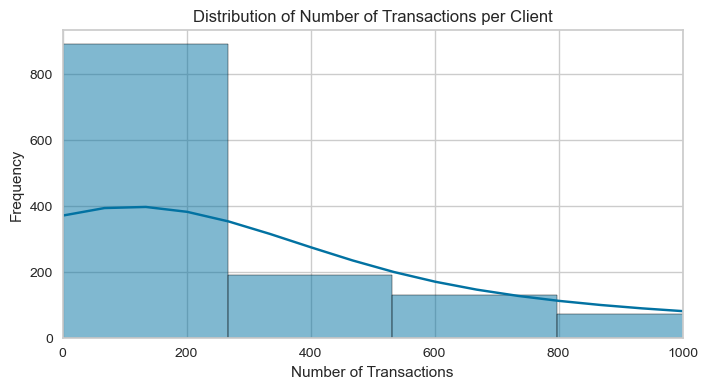

In [61]:
plt.figure(figsize=(8, 4))
sns.histplot(features_clientes['n_transactions'], bins=50, kde=True)
plt.xlim(0, 1000)  
plt.title('Distribution of Number of Transactions per Client')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

